# Simulate your Dynamics System with Python

### Simple Cruise Control Systems
Suppose we have very simple and straightforward first order linear system such as cruise control systems





![alt text](http://ctms.engin.umich.edu/CTMS/Content/CruiseControl/System/Modeling/figures/cruise_control_schematic.png)



Source : [Control Tutorials for MATLAB and Simulink, Michigan University](http://ctms.engin.umich.edu/CTMS/index.php?example=CruiseControl&section=SystemModeling)


With the systems equations denoted below, 

$ \begin{align} m\dot{v}+bv= u \end{align}$

Since the aim of our system is to control the velocity so the output is,

$ y = v $

Where v is the vehicle velocity in (m/s), u is the control input force (N), m is the vehicle mass (kg), and b is the damping coefficient (Ns/m)

Then, we can derive the state space equation for the system as

$ x = v $

$ \dot{v} = \dot{x} $

$ \dot{x} = -\frac{b}{m}x\, + \frac{1}{m} u$

$ y = x $

So we get the state space matrix (in this case scalar because our system just first order system),

$ A = -\frac{b}{m} $

$ B = \frac{1}{m} $

$ C = 1$

Assuming that our system have parameter below,

$m = 1500\, \text{kg}$

$b =  30\, \text{Ns/m}$

In [159]:
# Plugging the parameter into the state space matrix, getting

# Params
m = 1000
b = 50

# State Space Matrix
A = -np.divide(b,m)
B = np.divide(1,m)
C = 1

print("The State Space Matrix"),
print(f"A : {A}")
print()
print(f"B : {B}")
print()
print(f"C : {C}")

# Okay in this case not matrix but it's scalar, but I often call it state space matrix

The State Space Matrix
A : -0.05

B : 0.001

C : 1


#### Import Numpy, Scipy, and Matplotlib Library

In [0]:
import numpy as np
from numpy.linalg import inv
import scipy
import matplotlib.pyplot as plt

### The Numerical Integration
There are several ways to do a numerical integration for knowing the trajectory of our dynamical system, from the simplest one into the complex but wholly more accurate compared to the simple method.

The list of numerical integration methods:


1.   Forward Euler
2.   Backward Euler
3.   Runge Kutta 3rd Order (ODE23)
4.   Runge Kutta 4th Order (ODE45)

There are comparison according to the accuracy of the integrator which state that ODE45 has best accuracy among the others, the error comparison can be seen below

<img src="https://beltoforion.de/en/runge-kutta_vs_euler//images/analytic_accuracy_vs_stepsize.svg" height = "400" width = "400" align="center" />

Source : [A Comparison of Numeric Integration Schemes, Beltoforion.de](https://beltoforion.de/article.php?a=runge-kutta_vs_euler&p=calculation_samples)

So because of that ODE45 is vastly used on the numerical integration scheme of dynamical systems

#### 1. Forward Euler Method
$ X_{k+1} = X_k + X'_k * \Delta_t$

Also we can write that equation as,

$X_{k+1}=[I + \Delta_tA]X_k$

In [0]:
def forward_euler(init_pos, steps, A, B, u):
  nextstate = np.dot(np.eye(A.shape[0]) + np.multiply(A + np.multiply(B, u), steps), init_pos) 
  return nextstate

#### 2. Backward Euler Method
$ X_{k+1} = X_k + X'_{k+1}*\Delta_t$

Also we can write that equation as,

$ X_{k+1} = [I-\Delta_tA]^{-1} X_k$

In [0]:
def backward_euler(init_pos, steps, A, B, u):
  nextstate = np.dot(inv(np.eye(A.shape[0]) - np.multiply(A + np.multiply(B,u), steps)), init_pos) 
  return nextstate

### 3. Runge Kutta 3rd Order (ODE23)

### 4. Runge Kutta 4th Order (ODE45)

### Let's Do The Simulation

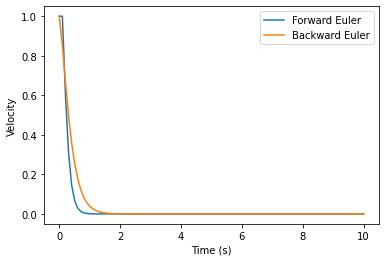

In [330]:
init_state = 20
steps = 0.1
T = 10
totalsteps = int(T / steps) 
d = 1
w = 2* np.pi 

A = np.array([[0,1], [-w**2, -2*d*w]])

t = np.linspace(0, 10, totalsteps)
u = np.heaviside(t, 1)
x = np.array([[1,0]])
xb = x
xf = x 

## Forward Euler
for k in range(0, t.shape[0]-1):
  xf = np.concatenate((xf, forward_euler(xf[k,:].T, steps, A, 0, 0).T.reshape((1,2))), axis = 0)

## Backward Euler
for k in range(0, t.shape[0]-1):
  xb = np.concatenate((xb, backward_euler(xb[k,:].T, steps, A, 0, 0).T.reshape((1,2))), axis = 0)

## ODE23

## ODE45

xf = np.dot(xf, np.array([[1, 0]]).T)
xb = np.dot(xb, np.array([[1, 0]]).T)
plt.plot(t,xf, label = 'Forward Euler')
plt.plot(t,xb, label = 'Backward Euler')
plt.xlabel('Time (s)')
plt.ylabel('Velocity')
plt.legend(loc = 0)
plt.show()